In [3]:
# Load library
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.offline as pyo
%matplotlib inline

In [8]:
# Load dataset 
df = pd.read_csv('iris.csv')
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [4]:
df.shape

(150, 5)

In [14]:
# Visualize Data
px.scatter(df, x='variety',y='petal.width', size='petal.width')

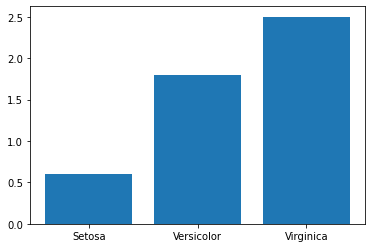

In [16]:
plt.bar(df['variety'],df['petal.width']);

<Figure size 1080x1440 with 0 Axes>

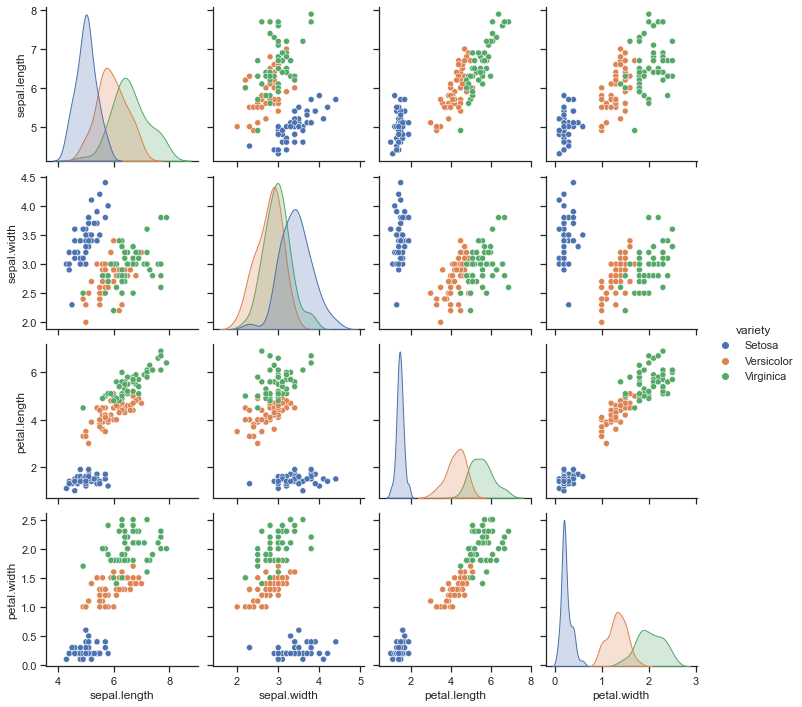

In [26]:
plt.figure(figsize=(15,20))
sns.set_theme(style="ticks")
sns.pairplot(df, hue="variety");

In [27]:
# Data Processing

In [40]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
x  = df.drop(['variety'], axis=1)
y  = df['variety']
le = LabelEncoder()
y  = le.fit_transform(y)
x = np.array(x)

In [42]:
# Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=5)
print("shape of x_train = ", x_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of x_test  = ", x_test.shape)
print("shape of y_test  = ", y_test.shape)

shape of x_train =  (105, 4)
shape of y_train =  (105,)
shape of x_test  =  (45, 4)
shape of y_test  =  (45,)


In [44]:
# Build Up Model

In [48]:
# Decision Tree Algorithm
from sklearn import tree
from sklearn.metrics import accuracy_score
DT = tree.DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [50]:
prediction_DT = DT.predict(x_test)

In [61]:
accuracy_DT = accuracy_score(y_test,prediction_DT).round(2) * 100
print("Accuracy Score for Decision Tree :",accuracy_DT)

Accuracy Score for Decision Tree : 96.0


In [55]:
y_test

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1])

In [56]:
prediction_DT

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1])

In [64]:
df.variety.value_counts()

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

In [65]:
category = ['Setosa','Versicolor','Virginica']

In [90]:
X_DT            = np.array([[0,1,0,1]])

In [91]:
X_DT_Prediction = DT.predict(X_DT)

In [94]:
category[int(X_DT_Prediction)]

'Virginica'

In [ ]:
# KNN Algorithm

In [110]:
df.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [111]:
x_train[0:3,:]

array([[6.2, 2.8, 4.8, 1.8],
       [5.9, 3. , 4.2, 1.5],
       [6.7, 3.3, 5.7, 2.1]])

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(x_train)  
x_train_std=sc.transform(x_train)
x_test_std=sc.transform(x_test)

In [153]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(n_neighbors=7)

In [154]:
knn_predict = knn.predict(x_test_std)
knn_predict

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1])

In [155]:
accuracy_KNN = accuracy_score(y_test,knn_predict).round(2) * 100
print("Accuracy Score for K-Nearest Neighbours :",accuracy_KNN)

Accuracy Score for K-Nearest Neighbours : 96.0


In [156]:
x_knn        = np.array([[0,1,0,1]])
x_knn_prdict = knn.predict(x_knn)
x_knn_prdict[0]
print(category[int(x_knn_prdict[0])])

Versicolor


In [157]:
k_range     = range(1,26)
scores      = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    knn_predict = knn.predict(x_test_std)
    scores[k] = accuracy_score(y_test,knn_predict)
    scores_list.append(accuracy_score(y_test,knn_predict))

In [158]:
 scores_list

[0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9777777777777777,
 0.9777777777777777,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9111111111111111,
 0.9333333333333333,
 0.9333333333333333]

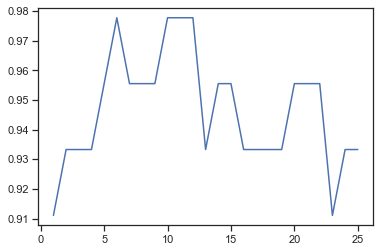

In [159]:
plt.plot(k_range,scores_list)